<h1><center>Part II: Explanatory Data Analysis - Prosper Loan</center></h1>
<center>By</center>
<h3><center>Nishanth Iruthayaraj</center></h3>


## Summary of Findings

- This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


- We perform some preliminary wrangling and start exploring the features of the dataset as univariate, bivariate and multivariate exploration.


##### Obervation of Univariate exploration:
- What are the findings of main feature of interest?

    - The distribution of Borrower's Annual Percentage Rate (APR) is a multimodal. In addition, there is an unusual spike in the percentage rate around 0.36.   
- What are the findings of other features supporting the investigation?
    - The most frequent loan term is 36 months. The 60 months loan term stands in the second position. But the loan term for 12 months is very very less. It shows that only very few borrowers take loan for short term. 

    - Many of the loan are in current status. Also there are many loans that has been Completed, Chargedoff and Deafaulted. 
    - Past Due (based on days) and the Cancellation (5 counts) status are very minimum comapred to the other loan status. 

    - The interest rate has the multimodal distribution
    - It looks also similar to the distribution of varibale `borrower_APR`

    - There are huge amount of borrowers has very highest risk score (0).
    - The most of the prosper score of the borrowers lies between the range of 2 and 10.  

    - Debt Consolidation is the most frequent loan category that the borrowers applied for

    - The most the borrowers applied for loan are "Employed"

    - Surprisingly, there are equal amount of borrowers i.e: even if the Borrower has their own home or not, the loan Borrowers are almost equal.

    - The most common range of borrower's income is between the range of 2500 and 500. 
    - The income distribution of the borrowrs are right skewed
    - The approximate maximum income lies around 42000

    - The most common loan amount taken by the borrowers is approximately 4500
    - The distribution of the loan amount is also right skewed with multiple spikes

##### Obervation of Bivariate exploration:
- How is the main feature of interest related to other variable and how does main feature varies with other features of interest? 

    - The Annual Percentage Rate (APR) of Borrowers is decreasing when the loan original amount increases i.e. the `borrower_APR` is negatively correlated with respect to `loan_original_amount`. Also the length of the `term` increase when there is an increase in the `loan_original_amount`. When the Borrowers has higher monthly income, they are capable of getting the high loan amount and can afford to payback the loan amount on monthly basis. 

    - In addition to the above relationships between the features, we can see that the Homeowner has the higher employment rate while comapring to borrowers who doesn't own home. Also The maximam amount of loan take by Homeowner is around 35000 and the Non-Homeowner has around 25000. This also proves that the borrowers can take more loan amount when they own some properties. 

##### Obervation of Multivariate exploration:
- The densed `borrower_APR` percentage for the loan `term` of 36 months lies between the range of between 0.05 and 0.4. Whereas the `borrower_APR` percentage for the loan `term` of 60 months lies between the range of 0.09 and 0.36. Also the `borrower_APR` percentage for the loan `term` of 12 months lies between the range of 0.05 and 0.36. It can conclude that the `term` does not affect the `borrower_APR` percentage rate significantly. 
- The interesting insights from the exploration is that the `monthly_loan_payment` decreases gradually when there is an increase in `loan_original_amount` and `term`.   

In the further presentation, the readers can see the visualization for about summary with polished plots

## Preliminary Wrangling
In this section, we perform the wrangling process on the prosper loan dataset to investigate further exploratory data analysis.

In [1]:
# importing required dependencies 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

# ignore the pandas depreciation and other warning
pd.set_option('mode.chained_assignment', None)
warnings.simplefilter(action='ignore', category=FutureWarning)

# magic function to render the figure below each cell
%matplotlib inline

In [2]:
# reading the .csv file into dataframe df_prosper
df_prosper = pd.read_csv('prosperLoanData.csv')
df_prosper

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [3]:
# concise summary of a dataFrame
df_prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Generally, there should be some significant factors that all the banks will consider before approving any loans to the clients. But in our dataset, there are 81 variables availbale and many of these varibales are used for different purposes. Therefore, I chose 15 variables that focus on our exploratory data analysis. 

In [4]:
# making focus varibales into a list and creating separate dataframe 
focus_varibales = ['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate', 'MonthlyLoanPayment']
df_prosper2 = df_prosper[focus_varibales]

In [5]:
# concise summary of a dataFrame
df_prosper2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerAPR                113912 non-null  float64
 3   BorrowerRate               113937 non-null  float64
 4   ProsperScore               84853 non-null   float64
 5   ListingCategory (numeric)  113937 non-null  int64  
 6   EmploymentStatus           111682 non-null  object 
 7   EmploymentStatusDuration   106312 non-null  float64
 8   IsBorrowerHomeowner        113937 non-null  bool   
 9   DebtToIncomeRatio          105383 non-null  float64
 10  StatedMonthlyIncome        113937 non-null  float64
 11  LoanOriginalAmount         113937 non-null  int64  
 12  LoanOriginationDate        113937 non-null  object 
 13  MonthlyLoanPayment         11

### Data Cleaning
In this section, we perform various required cleaning methods on the new dataset

In [6]:
# define dictionary to rename the column readable for users
rename_dict = {'Term':'term', 'LoanStatus':'loan_status', 'BorrowerAPR':'borrower_APR', 
                 'BorrowerRate':'borrower_rate', 'ProsperScore':'prosper_score', 'ListingCategory (numeric)':'listing_category_numeric', 
                 'EmploymentStatus':'employmentstatus', 'EmploymentStatusDuration':'employment_status_duration', 
                 'IsBorrowerHomeowner':'is_borrower_homeowner', 'DebtToIncomeRatio':'debt_to_income_ratio',
                 'StatedMonthlyIncome':'stated_monthly_income', 'LoanOriginalAmount':'loan_original_amount', 
                 'LoanOriginationDate':'loan_origination_date', 'MonthlyLoanPayment':'monthly_loan_payment'}

# rename columns in DataFrame using dictionary
df_prosper2.rename(columns=rename_dict, inplace=True)

In [7]:
# convert 'loan_origination_date' column to datetime
df_prosper2['loan_origination_date'] = pd.to_datetime(df_prosper2['loan_origination_date'])

In [8]:
# get a list of column names that have NaN values
columns_NULL = list(df_prosper2.columns[df_prosper2.isnull().any()])
columns_NULL

['borrower_APR',
 'prosper_score',
 'employmentstatus',
 'employment_status_duration',
 'debt_to_income_ratio']

In [9]:
# get value counts for those NULL columns
for col in columns_NULL:
    print('column=',col, ', has_NULL=', df_prosper2[col].isnull().any(), '\n',df_prosper2[col].value_counts(), '\n\n')

column= borrower_APR , has_NULL= True 
 0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
           ... 
0.37266       1
0.27518       1
0.18477       1
0.29961       1
0.19543       1
Name: borrower_APR, Length: 6677, dtype: int64 


column= prosper_score , has_NULL= True 
 4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: prosper_score, dtype: int64 


column= employmentstatus , has_NULL= True 
 Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: employmentstatus, dtype: int64 


column= employment_status_duration , has_NULL= True 
 0.0      1534
4.0      1186
1.0      1177
3.0      1174
2.0      1153
         ... 
648.0       1
662.0       1
733.0       1
690.0       1
578.0       1
Name: employment_status_du

In [10]:
df_prosper2.describe()

,term,borrower_APR,borrower_rate,prosper_score,listing_category_numeric,employment_status_duration,debt_to_income_ratio,stated_monthly_income,loan_original_amount,monthly_loan_payment
count,113937.000000,113912.000000,113937.000000,84853.000000,113937.000000,106312.000000,105383.000000,1.139370e+05,113937.00000,113937.000000
mean,40.830248,0.218828,0.192764,5.950067,2.774209,96.071582,0.275947,5.608026e+03,8337.01385,272.475783
std,10.436212,0.080364,0.074818,2.376501,3.996797,94.480605,0.551759,7.478497e+03,6245.80058,192.697812
min,12.000000,0.006530,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1000.00000,0.000000
25%,36.000000,0.156290,0.134000,4.000000,1.000000,26.000000,0.140000,3.200333e+03,4000.00000,131.620000
50%,36.000000,0.209760,0.184000,6.000000,1.000000,67.000000,0.220000,4.666667e+03,6500.00000,217.740000
75%,36.000000,0.283810,0.250000,8.000000,3.000000,137.000000,0.320000,6.825000e+03,12000.00000,371.580000
max,60.000000,0.512290,0.497500,11.000000,20.000000,755.000000,10.010000,1.750003e+06,35000.00000,2251.510000


In [11]:
# fill NaN values with 0 for 'borrower_APR', 'prosper_score', 'employment_status_duration' and 'debt_to_income_ratio'
df_prosper2[['borrower_APR', 'prosper_score', 'employment_status_duration', 'debt_to_income_ratio']] = df_prosper2[['borrower_APR', 'prosper_score', 'employment_status_duration', 'debt_to_income_ratio']].fillna(0)

In [12]:
# concise summary of a dataFrame
df_prosper2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   term                        113937 non-null  int64         
 1   loan_status                 113937 non-null  object        
 2   borrower_APR                113937 non-null  float64       
 3   borrower_rate               113937 non-null  float64       
 4   prosper_score               113937 non-null  float64       
 5   listing_category_numeric    113937 non-null  int64         
 6   employmentstatus            111682 non-null  object        
 7   employment_status_duration  113937 non-null  float64       
 8   is_borrower_homeowner       113937 non-null  bool          
 9   debt_to_income_ratio        113937 non-null  float64       
 10  stated_monthly_income       113937 non-null  float64       
 11  loan_original_amount        113937 non-

In [13]:
df_prosper2.head()

,term,loan_status,borrower_APR,borrower_rate,prosper_score,listing_category_numeric,employmentstatus,employment_status_duration,is_borrower_homeowner,debt_to_income_ratio,stated_monthly_income,loan_original_amount,loan_origination_date,monthly_loan_payment
0,36,Completed,0.16516,0.1580,0.0,0,Self-employed,2.0,True,0.17,3083.333333,9425,2007-09-12,330.43
1,36,Current,0.12016,0.0920,7.0,2,Employed,44.0,False,0.18,6125.000000,10000,2014-03-03,318.93
2,36,Completed,0.28269,0.2750,0.0,0,Not available,0.0,False,0.06,2083.333333,3001,2007-01-17,123.32
3,36,Current,0.12528,0.0974,9.0,16,Employed,113.0,True,0.15,2875.000000,10000,2012-11-01,321.45
4,36,Current,0.24614,0.2085,4.0,2,Employed,44.0,True,0.26,9583.333333,15000,2013-09-20,563.97


In [14]:
df_prosper.shape

(113937, 81)

##### What is the structure of your dataset?
The prosper loan dataset structure is 113,937 loans and 81 variables (can be found found using `df_prosper2.shape`). But I have chosen 14 variables required for our exploratory data analysis.

##### What is/are the main feature(s) of interest in your dataset?
The significant feature of interest in the dataset is the `borrower_APR` feature. `borrower_rate` can also be another vital feature. 

##### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I think that the features such as 'term', 'loan_status', 'borrower_APR', 'borrower_rate', 'prosper_score', 'listing_category_numeric', 'employmentstatus', 'employment_status_duration', etc., will help support my investigation into feature of interest (`borrowers_APR`)

## Univariate Exploration
In this section I explore the univariate data and find the insights by visualizing distribution for all the chosen varibles individually. I have followed "Question-Visualization-Observation" framework to make our exploration clean and tidy. Firstly, I have shown the main feature of interest and then visualizing some other important features by following the order of varibales in our new dataframe.

##### Visualization 1:
`borrower_APR`: The Borrower's Annual Percentage Rate (APR) for the loan.

Question: What type of distribution does the feature of interest has? 

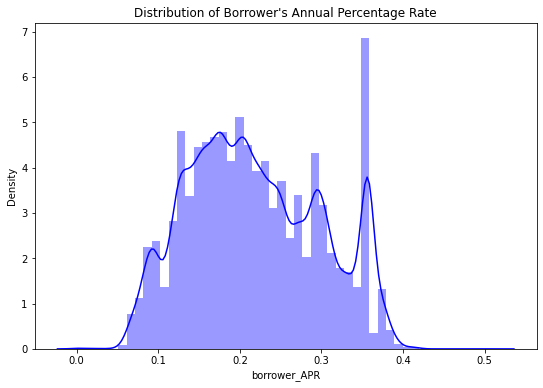

In [15]:
# visualization of 'borrower_APR' distribution
fig, ax = plt.subplots(figsize=(9,6))
ax.set_title("Distribution of Borrower's Annual Percentage Rate")
sb.distplot(df_prosper2['borrower_APR'], ax=ax, color='blue')
plt.show()

Observation: 
- It is clear that the distribution of Borrower's Annual Percentage Rate (APR) is a multimodal 
- The borrower_APR has highest percentage rate around 0.36

##### Visualization 2:
`term`: The length of the loan expressed in months.

Question: What in the most frequent loan term? 

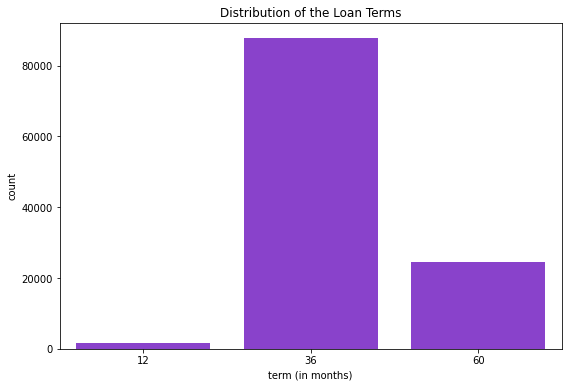

In [16]:
# visualization of loan terms
fig, ax = plt.subplots(figsize=(9,6))
ax.set_title("Distribution of the Loan Terms")
sb.countplot(df_prosper2['term'], ax=ax, color='blueviolet')
# plt.legend(labels=["Loan Terms"])
plt.xlabel('term (in months)')
plt.show()

Observation: 
- The most frequent loan term is 36 months. The 60 months loan term stands in the second position. But the loan term for 12 months is very very less. It shows that only very few borrowers take loan for short term. 

##### Visualization 3:
`loan_status`: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue.

Question: What is the most loan status from the provider side?  

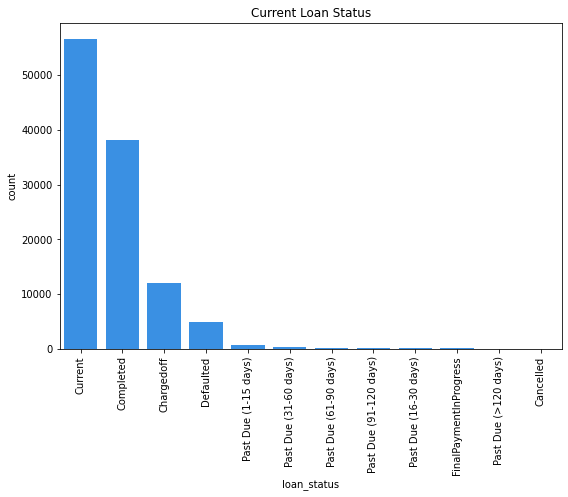

In [17]:
# visualization of loan status
fig, ax = plt.subplots(figsize=(9,6))
ax.set_title("Current Loan Status")
sb.countplot(df_prosper2['loan_status'], ax=ax, color='dodgerblue', order=df_prosper2['loan_status'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [18]:
df_prosper2.loan_status.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: loan_status, dtype: int64

Observation:
- Many of the loan are in current status. Also there are many loans that has been Completed, Chargedoff and Deafaulted. 
- Past Due (based on days) and the Cancellation (5 counts) status are very minimum comapred to the other loan status. 

##### Visualization 4:
`borrower_rate`: The Borrower's interest rate for this loan. 

Question: What is the distribution of interest rate for the Borrowers?

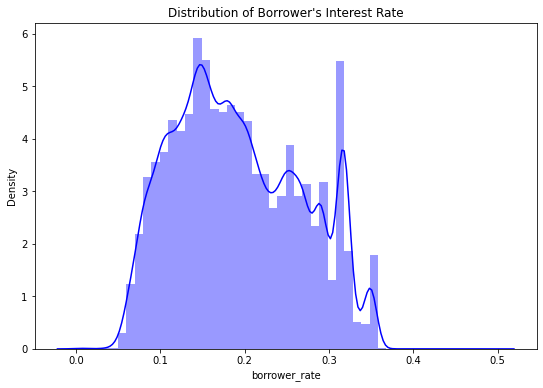

In [19]:
# visualization of 'borrower_rate' distribution
fig, ax = plt.subplots(figsize=(9,6))
ax.set_title("Distribution of Borrower's Interest Rate")
sb.distplot(df_prosper2['borrower_rate'], ax=ax, color='blue')
plt.show()

Observation:
- The interest rate has the multimodal distribution
- It looks also similar to the distribution of varibale `borrower_APR`

##### Visualization 5:
`prosper_score`: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.

Question: What is the prosper score of the Borrowers?

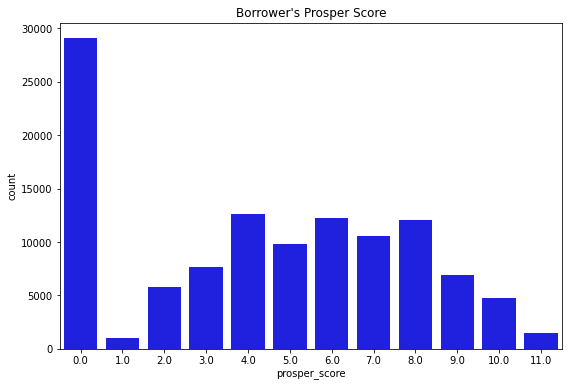

In [20]:
# visualization of 'borrower_rate'
fig, ax = plt.subplots(figsize=(9,6))
ax.set_title("Borrower's Prosper Score")
sb.countplot(df_prosper2['prosper_score'], ax=ax, color='blue')
plt.show()

Observation:
- There are huge amount of borrowers has very highest risk score (0).
- The most of the prosper score of the borrowers lies between the range of 2 and 10.  

##### Visualization 6: 
`listing_category_numeric`: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

Question: Whcih is the most frequent loan category?

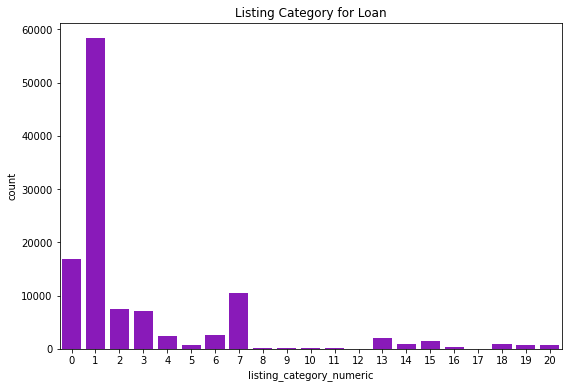

In [21]:
# visualization of 'listing_category_numeric' 
fig, ax = plt.subplots(figsize=(9,6))
ax.set_title("Listing Category for Loan")
sb.countplot(df_prosper2['listing_category_numeric'], ax=ax, color='darkviolet')
plt.show()

Observation:
- Debt Consolidation is the most frequent loan category that the borrowers applied for

##### Visualization 7: 
`employmentstatus`: The employment status of the borrower at the time they posted the listing.

Question: What is most employment status of the borrower applied for loan?

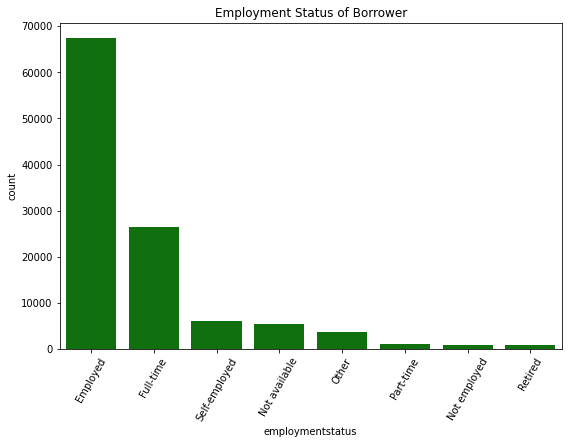

In [22]:
# visualization of 'employmentstatus' 
fig, ax = plt.subplots(figsize=(9,6))
ax.set_title("Employment Status of Borrower")
sb.countplot(df_prosper2['employmentstatus'], ax=ax, color='green', order=df_prosper2['employmentstatus'].value_counts().index)
plt.xticks(rotation=60)
plt.show()

Observation: 
- The most the borrowers applied for loan are "Employed"

##### Visualization 8
`is_borrower_homeowner`: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

Question: Is most of the Borrower homeowner?

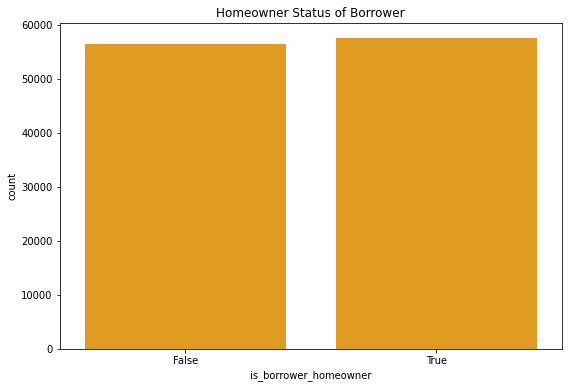

In [23]:
# visualization of 'is_borrower_homeowner' 
fig, ax = plt.subplots(figsize=(9,6))
ax.set_title("Homeowner Status of Borrower")
sb.countplot(df_prosper2['is_borrower_homeowner'], ax=ax, color='orange')
plt.show()

Observation:
- Surprisingly, there are equal amount of borrowers i.e: even if the Borrower has their own home or not, the loan Borrowers are almost equal.

##### Visualization 9:
`stated_monthly_income`: The monthly income the borrower stated at the time the listing was created.

Question: What is the most common range of monthly income of the borrowers?

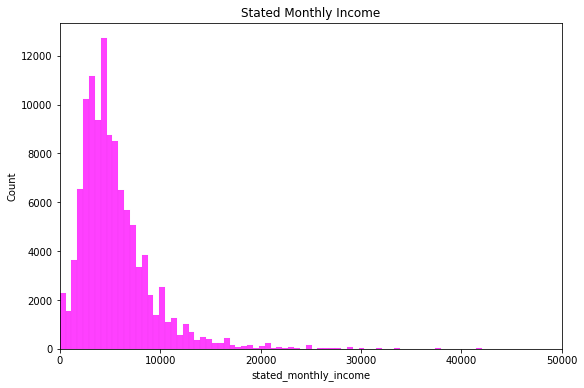

In [24]:
# visualization of 'stated_monthly_income' 
fig, ax = plt.subplots(figsize=(9,6))
ax.set_title("Stated Monthly Income")
sb.histplot(df_prosper2['stated_monthly_income'], ax=ax, color='magenta', bins=3000)
plt.xlim(0, 50000)
plt.show()

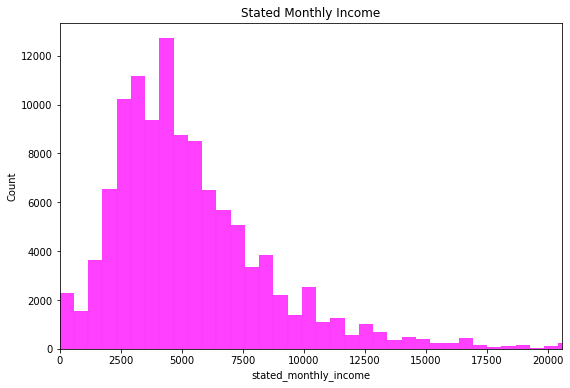

In [25]:
# limiting the edges even smaller
bins_limit = df_prosper2['stated_monthly_income'].mean() + df_prosper2['stated_monthly_income'].std() * 2
fig, ax = plt.subplots(figsize=(9,6))
ax.set_title("Stated Monthly Income")
sb.histplot(df_prosper2['stated_monthly_income'], ax=ax, color='magenta', bins=3000)
plt.xlim(0, bins_limit)
plt.show()

Observation:
- The most common range of borrower's income is between the range of 2500 and 500. 
- The income distribution of the borrowrs are right skewed
- The approximate maximum income lies around 42000

##### Visaulization 10:
`loan_original_amount`: The origination amount of the loan.

Question: What is the most common loan amount taken by the borrowers?

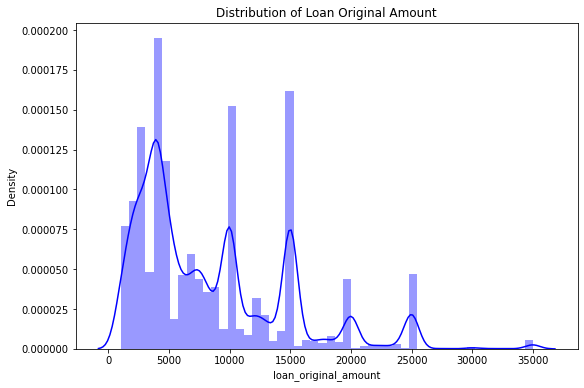

In [26]:
# visualization of 'borrower_APR' distribution
fig, ax = plt.subplots(figsize=(9,6))
ax.set_title("Distribution of Loan Original Amount")
sb.distplot(df_prosper2['loan_original_amount'], ax=ax, color='blue')
plt.show()

Observation:
- The most common loan amount taken by the borrowers is approximately 4500
- The distribution of the loan amount is also right skewed with multiple spikes

##### Obervation of Univariate exploration:

- What are the findings of main feature of interest?

    - The distribution of Borrower's Annual Percentage Rate (APR) is a multimodal. In addition, there is an unusual spike in the percentage rate around 0.36.
    
    
- What are the findings of other features supporting the investigation?
    - The most frequent loan term is 36 months. The 60 months loan term stands in the second position. But the loan term for 12 months is very very less. It shows that only very few borrowers take loan for short term. 

    - Many of the loan are in current status. Also there are many loans that has been Completed, Chargedoff and Deafaulted. 
    - Past Due (based on days) and the Cancellation (5 counts) status are very minimum comapred to the other loan status. 

    - The interest rate has the multimodal distribution
    - It looks also similar to the distribution of varibale `borrower_APR`

    - There are huge amount of borrowers has very highest risk score (0).
    - The most of the prosper score of the borrowers lies between the range of 2 and 10.  

    - Debt Consolidation is the most frequent loan category that the borrowers applied for

    - The most the borrowers applied for loan are "Employed"

    - Surprisingly, there are equal amount of borrowers i.e: even if the Borrower has their own home or not, the loan Borrowers are almost equal.

    - The most common range of borrower's income is between the range of 2500 and 500. 
    - The income distribution of the borrowrs are right skewed
    - The approximate maximum income lies around 42000

    - The most common loan amount taken by the borrowers is approximately 4500
    - The distribution of the loan amount is also right skewed with multiple spikes

## Bivariate Exploration
In this section, we will continue our exploration for two variables. In this bivariate exploration, we can see the visulaization of varibles that plays a vital role in investigation.

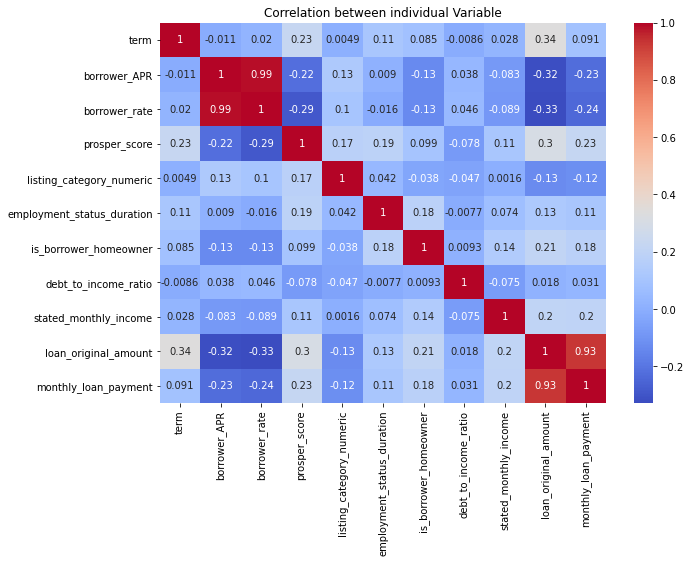

In [27]:
# replace True or False to numeric
df_prosper2['is_borrower_homeowner'] = df_prosper2['is_borrower_homeowner'].replace({True: 1, False: 0})

# visualization of heatmap to find correlation
fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("Correlation between individual Variable")
numeric_cols = df_prosper2.select_dtypes(include='number')
sb.heatmap(numeric_cols.corr(), cmap="coolwarm", annot=True)
plt.show()

The above heat map shows us the correlation between each varibale with their strength. Also I would like to explore some important correlations with maximum or minimum coefficients as below,
- `term` vs `loan_original_amount` : positive cocoefficient = 0.34
- `borrower_APR` vs `loan_original_amount`: negative coefficient = -0.32
- `listing_category_numeric` vs `prosper_score`: positive cocoefficient = 0.17
- `employment_status_duration` vs `is_borrower_homeowner`: positive cocoefficient = 0.18
- `is_borrower_homeowner` vs `loan_original_amount` : positive cocoefficient = 0.21
- `stated_monthly_income` vs `loan_original_amount` : positive cocoefficient = 0.2
- `stated_monthly_income` vs `monthly_loan_payment` : positive cocoefficient = 0.2
- `loan_original_amount` vs `monthly_loan_payment` : positive cocoefficient = 0.93

I haven't included the correlation for the variable `debt_to_income_ratio`, as its correlation with other variables are near to 0.

##### Visualization 11: 
`term` vs `loan_original_amount`

Question: What is common term given for the higher loan amount? 

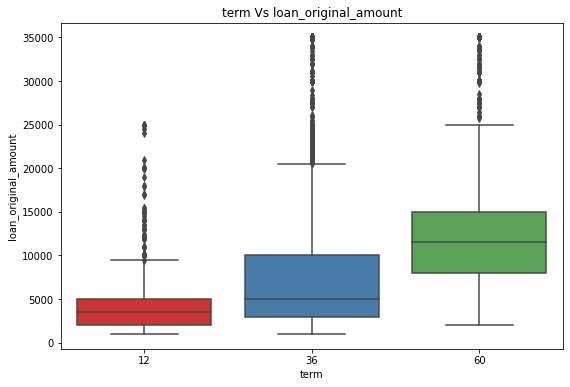

In [28]:
# visualization of term vs loan_original_amount
fig, ax = plt.subplots(figsize=(9, 6))
sb.boxplot(data=df_prosper2, x='term', y='loan_original_amount', palette='Set1', ax=ax)
ax.set_title('term Vs loan_original_amount')
plt.show()

Observation:
- When there is a higher loan amount, the loan term also increases gradually

##### Visualization 12:
`borrower_APR` vs `loan_original_amount`

Question: Does the higher loan amount has an impact on Borrower's APR?

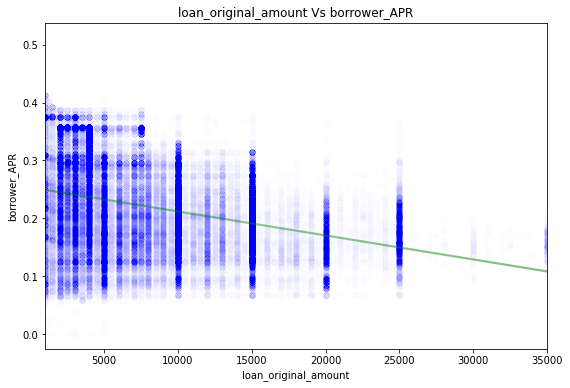

In [29]:
# visualization of borrower_APR vs loan_original_amount
fig, ax = plt.subplots(figsize=(9, 6))
# to see the impact on Borrower's APR, we plot the varibles in different axes
sb.regplot(data=df_prosper2, x='loan_original_amount', y='borrower_APR', scatter_kws={'alpha': 0.005, 'color': 'blue'}, line_kws={'alpha': 0.4, 'color': 'green'}, ax=ax) 
ax.set_title('loan_original_amount Vs borrower_APR')
plt.show()

Observation:
- The visualization states that the Annual Percentage Rate (APR) of Borrowers is defintely decrease when the loan original amount increases. 

##### Visualization 13:
`listing_category_numeric` vs `prosper_score`

Question: Which loan category has the higher risk of prosper score?

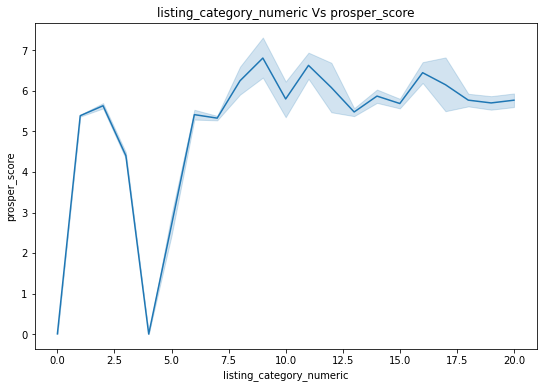

In [30]:
# visualization of listing_category_numeric vs prosper_score
fig, ax = plt.subplots(figsize=(9, 6))
sb.lineplot(data=df_prosper2, x='listing_category_numeric', y='prosper_score', palette='Set1', ax=ax)
ax.set_title('listing_category_numeric Vs prosper_score')
plt.show()

Observation:
- The Borrowers has the higher risk of prosper score for 4-Personal Loan.
- But the Borrowers has reasonable prosper score for loan category like 6-Auto, 7- Other, 8-Baby&Adoption, 9-Boat, 10-Cosmetic Procedure, etc.

##### Visaulization 14
`employment_status_duration` vs `is_borrower_homeowner`

Question: Who has more employment duration between Homeowner and Non-homeowner?

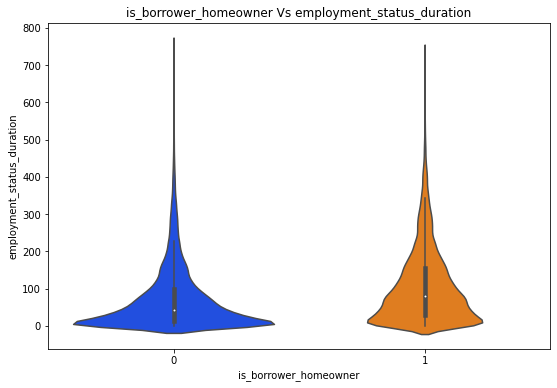

In [31]:
# visualization of is_borrower_homeowner vs employment_status_duration
fig, ax = plt.subplots(figsize=(9, 6))
sb.violinplot(data=df_prosper2, x='is_borrower_homeowner', y='employment_status_duration', palette='bright', ax=ax)
ax.set_title('is_borrower_homeowner Vs employment_status_duration')
plt.show()

Observation:
- It is clear that the homeowner have higher employment duration when comparing non-homeowner

##### Visualization 15:
`is_borrower_homeowner` vs `loan_original_amount`

Question: Who takes higher loan amount between Homeowner and Non-homeowner?

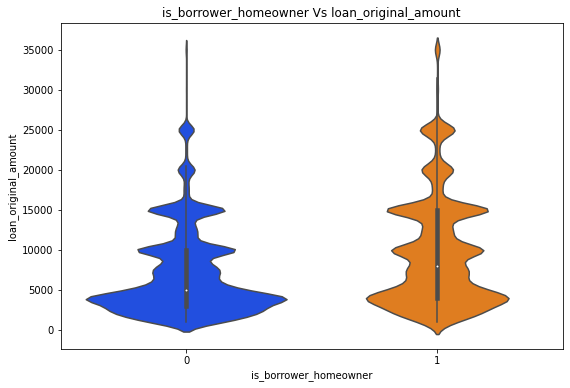

In [32]:
# visualization of is_borrower_homeowner vs loan_original_amount
fig, ax = plt.subplots(figsize=(9, 6))
sb.violinplot(data=df_prosper2, x='is_borrower_homeowner', y='loan_original_amount', palette='bright', ax=ax)
ax.set_title('is_borrower_homeowner Vs loan_original_amount')
plt.show()

Observation:
- The higher loan amount is taken by Homeowner with maximam amount of 35000.
- In contrast, the maximam loan amount taken by Non.Homeowner is around 25000

##### Visualization 16:
`stated_monthly_income` vs `loan_original_amount`

Question: How does the Monthly Income related to Loan Amount?

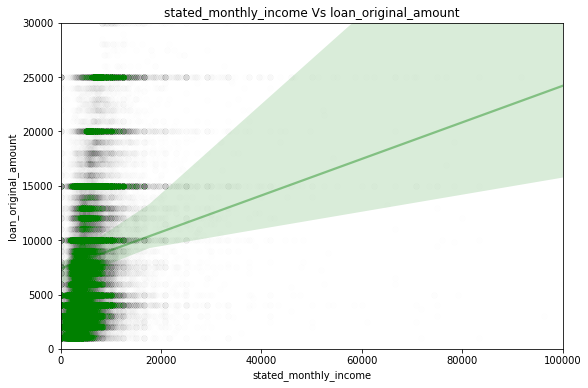

In [33]:
# visualization of stated_monthly_income vs loan_original_amount
fig, ax = plt.subplots(figsize=(9, 6))
sb.regplot(data=df_prosper2, x='stated_monthly_income', y='loan_original_amount', scatter_kws={'alpha': 0.005, 'color': 'green'}, line_kws={'alpha': 0.4, 'color': 'green'}, ax=ax) 
ax.set_title('stated_monthly_income Vs loan_original_amount')
plt.xlim(0,1e5)
plt.ylim(0,3e4)
plt.show()

Observation:
- The loan amount increase when the Borrowers has higher monthly income

##### Visualization 17:
`stated_monthly_income` vs `monthly_loan_payment`

Question: How does the Borrowers payback the loan monthly based on their income?

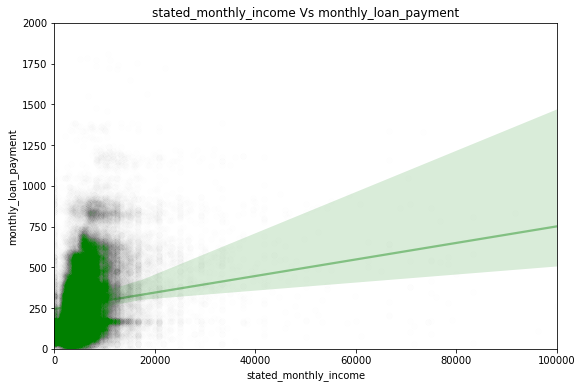

In [34]:

# visualization of stated_monthly_income vs monthly_loan_payment
fig, ax = plt.subplots(figsize=(9, 6))
sb.regplot(data=df_prosper2, x='stated_monthly_income', y='monthly_loan_payment', scatter_kws={'alpha': 0.005, 'color': 'green'}, line_kws={'alpha': 0.4, 'color': 'green'}, ax=ax) 
ax.set_title('stated_monthly_income Vs monthly_loan_payment')
plt.xlim(0,1e5)
plt.ylim(0,2e3)
plt.show()

Observation: 
- The Borrowers are capable of paying back the higher loan amount when thier income is higher.  

##### Visualization 18:
`loan_original_amount` vs `monthly_loan_payment`

Question: Does the monhtly loan payment increase or decreases for the higher loan amount? 

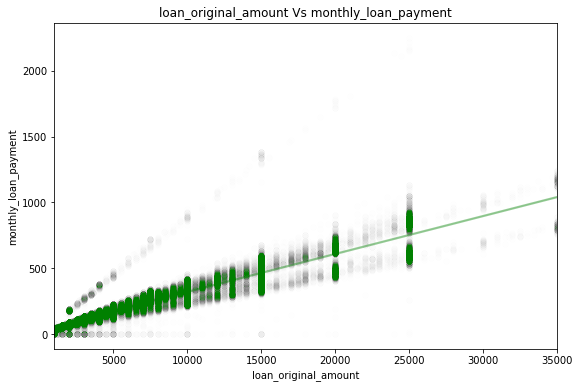

In [35]:
# visualization of loan_original_amount vs monthly_loan_payment
fig, ax = plt.subplots(figsize=(9, 6))
sb.regplot(data=df_prosper2, x='loan_original_amount', y='monthly_loan_payment', scatter_kws={'alpha': 0.005, 'color': 'green'}, line_kws={'alpha': 0.4, 'color': 'green'}, ax=ax) 
ax.set_title('loan_original_amount Vs monthly_loan_payment')
# plt.xlim(0,1e5)
# plt.ylim(0,2e3)
plt.show()

Observation:
- The monthly loan payment increases when the original loan amount increase. 

##### Obervation of Bivariate exploration:
- How is the main feature of interest related to other variable and how does main feature varies with other features of interest? 

    - The Annual Percentage Rate (APR) of Borrowers is decreasing when the loan original amount increases i.e. the `borrower_APR` is negatively correlated with respect to `loan_original_amount`. Also the length of the `term` increase when there is an increase in the `loan_original_amount`. When the Borrowers has higher monthly income, they are capable of getting the high loan amount and can afford to payback the loan amount on monthly basis. 

    - In addition to the above relationships between the features, we can see that the Homeowner has the higher employment rate while comapring to borrowers who doesn't own home. Also The maximam amount of loan take by Homeowner is around 35000 and the Non-Homeowner has around 25000. This also proves that the borrowers can take more loan amount when they own some properties. 

## Multivariate Exploration
In this section, we will continue our exploration for multiple variables i.e, more than two varibles and see how 3 different varibales are related

##### Visualization 19:
`loan_original_amount` vs `borrower_APR` vs `term`

Question: How does the feature `term` has an impact on the `loan_original_amount` and `borrower_APR`?

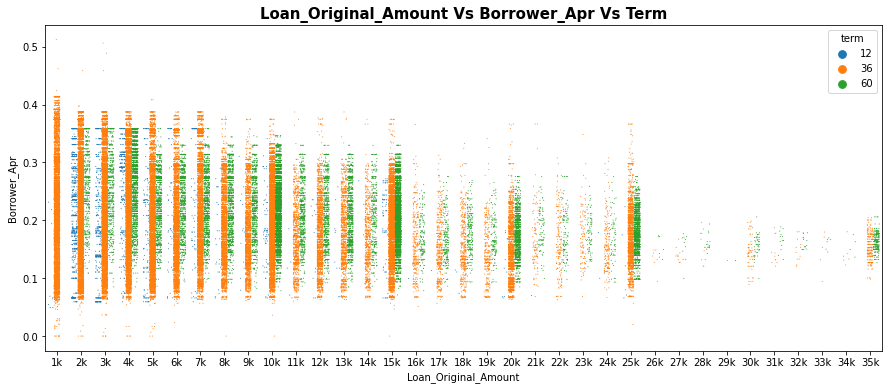

In [36]:
# create loan_original_amount intervals (say 10 years) using floor division (lowest integer divisor)
data = df_prosper2.dropna(subset = ['loan_original_amount']).copy()
data['loan_original_amount_int'] = (data['loan_original_amount']//10**3).astype(str) + 'k'
loan_order = sorted(data['loan_original_amount_int'].unique(), key=lambda x: int(x.replace('k','')))

# visualization of `loan_original_amount` vs `borrower_APR` vs `term`
plt.figure(figsize=(15,6))
sb.stripplot(data=data, x='loan_original_amount_int', y='borrower_APR', hue='term', order=loan_order, palette=sb.color_palette("tab10",3), size=1, jitter=0.35, dodge=True)
plt.title('loan_original_amount Vs borrower_APR Vs term'.title(), fontsize=15, fontweight='bold')
plt.xlabel('loan_original_amount'.title())
plt.ylabel('borrower_APR'.title())
plt.show()

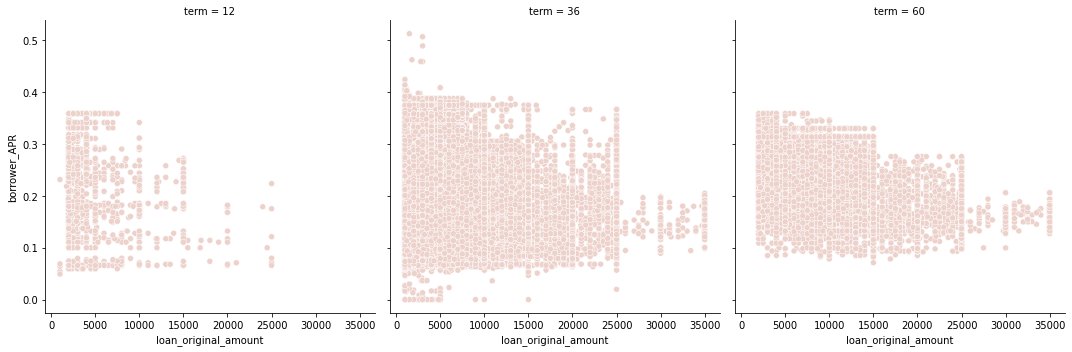

In [37]:
# above plot in bivariate format
g = sb.FacetGrid(data=df_prosper2, col='term', height=5, aspect=1)
g.map(sb.scatterplot, 'loan_original_amount', 'borrower_APR', 'term', color='blue')
plt.show()

Observation:
- The `borrower_APR` percentage for the loan `term` of 36 months lies between the range of 0 and 0.5. But the percentage rate are densed between 0.05 and 0.4 for most of the loan amounts.
- Whereas the `borrower_APR` percentage for the loan `term` of 60 months lies between the range of 0.09 and 0.36. All the percentage rate lies with this range without any outliers. 
- Finally the `borrower_APR` percentage for the loan `term` of 12 months lies between the range of 0.05 and 0.36. But the amount of loan for 12 months `term` is very less while comparing with 36 and 60 months. 

##### Visualization 20:
`loan_original_amount` vs `monthly_loan_payment` vs `term`

Question: What will be the monthly loan repayment for different terms?

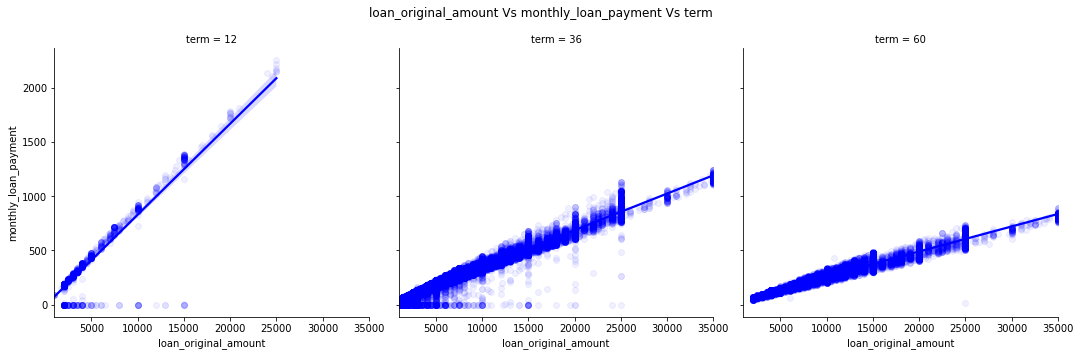

In [38]:
# visualization of loan_original_amount vs monthly_loan_payment vs term
g = sb.FacetGrid(data=df_prosper2, col='term', col_wrap=3, height=5, aspect=1)
g.map(sb.regplot, 'loan_original_amount', 'monthly_loan_payment', x_jitter=0.05, color='blue', scatter_kws={'alpha':0.06})
g.add_legend()
plt.suptitle("loan_original_amount Vs monthly_loan_payment Vs term")
plt.tight_layout()
plt.show()

Observation:
- It can be cleary seen that the `monthly_loan_payment` decreases gradually when there is an increase in `loan_original_amount` and `term`. 

##### Obervation of Multivariate exploration:
- The densed `borrower_APR` percentage for the loan `term` of 36 months lies between the range of between 0.05 and 0.4. Whereas the `borrower_APR` percentage for the loan `term` of 60 months lies between the range of 0.09 and 0.36. Also the `borrower_APR` percentage for the loan `term` of 12 months lies between the range of 0.05 and 0.36. It can conclude that the `term` does not affect the `borrower_APR` percentage rate significantly. 
- The interesting insights from the exploration is that the `monthly_loan_payment` decreases gradually when there is an increase in `loan_original_amount` and `term`. 

### Reference
1. https://www.dataquest.io/blog/settingwithcopywarning/
2. https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning
3. https://matplotlib.org/stable/gallery/color/named_colors.html
4. https://seaborn.pydata.org/tutorial/color_palettes.html